In [17]:
from nn_globals import *

from nn_encode import nlayers, nvariables

from nn_data import (muon_data_split, pileup_data_split, mix_training_inputs)

from nn_models import (create_model, create_model_bn, create_model_pruned, 
                       create_model_sequential, create_model_sequential_bn,
                       lr_decay, modelbestcheck, modelbestcheck_weights)

from nn_training import train_model

from nn_pruning import prune_model

%matplotlib inline

adjust_scale=3 # MK guess

[INFO    ] Using cmssw CMSSW_10_2_0
[INFO    ] Using numpy 1.14.1
[INFO    ] Using tensorflow 1.6.0
Using TensorFlow backend.
[INFO    ] Using keras 2.1.4
[INFO    ] .. list devices: [_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456)]
[INFO    ] Using scipy 1.1.0
[INFO    ] Using sklearn 0.19.1
[INFO    ] Using matplotlib 1.5.2


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
plt.style.use('tdrstyle.mplstyle')
%matplotlib inline

In [44]:
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [52]:
modelB = 'model633216'
modelA = 'model40_15_10'

dir_data = './saveddata/'
pt = 15.0

In [53]:
xdataB = np.load(dir_data+modelB+'_eff_xdata'+str(pt)+'.npy')
xerrB = np.load(dir_data+modelB+'_eff_xerr'+str(pt)+'.npy')
ydataB = np.load(dir_data+modelB+'_eff_ydata'+str(pt)+'.npy')
yerrB = np.load(dir_data+modelB+'_eff_yerr'+str(pt)+'.npy')

In [54]:
xdataA = np.load(dir_data+modelA+'_eff_xdata'+str(pt)+'.npy')
xerrA = np.load(dir_data+modelA+'_eff_xerr'+str(pt)+'.npy')
ydataA = np.load(dir_data+modelA+'_eff_ydata'+str(pt)+'.npy')
yerrA = np.load(dir_data+modelA+'_eff_yerr'+str(pt)+'.npy')

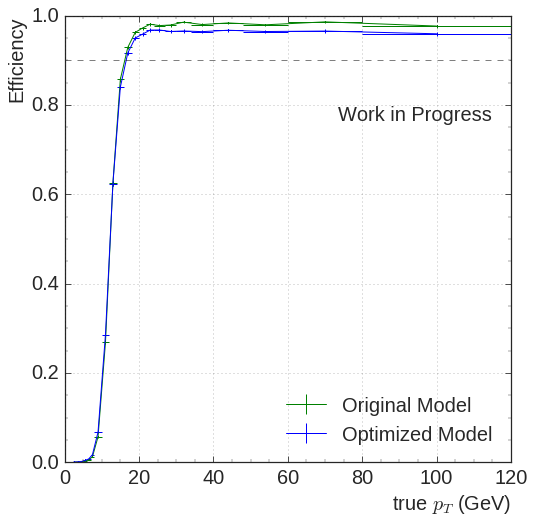

In [55]:
plt.figure(figsize=(8,8))

plt.errorbar(xdataB, ydataB, xerr=xerrB, yerr=yerrB, color='green', marker=',', capsize=0, lw=1,label='Original Model')
plt.errorbar(xdataA, ydataA, xerr=xerrA, yerr=yerrA, color='blue', marker=',', capsize=0, lw=1,label='Optimized Model')
plt.legend(loc=0,fontsize=20)
plt.plot([0,120], [0.9,0.9], ls='dashed', lw=0.5, color='black')
plt.xlim(0,120)
plt.ylim(0,1)
plt.text(115,0.8,'Work in Progress', fontsize=20,horizontalalignment='right',verticalalignment='top')

plt.xlabel(r'true $p_{T}$ (GeV)',horizontalalignment='right',x=1.0,fontsize=20)
plt.ylabel(r'Efficiency',horizontalalignment='right',y=1.0,fontsize=20)
plt.show()